*Importing libraries*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading dataframe

In [2]:
data = pd.read_csv(r"D:\Projects\Blinkit Sales Analysis\Dataset\BlinkIT Grocery Data Uncleaned.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Total Sales                8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
# dropping column item visibility
data.drop('Item Visibility',axis=1,inplace=True)


In [6]:
# checking for null values

data.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Weight                  1463
Total Sales                     0
Rating                          0
dtype: int64

*checking for  outlier in data['item weight']*

In [ ]:
Q1 = data['Item Weight'].quantile(0.25)
Q3 = data['Item Weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Item Weight'] < lower_bound) | (data['Item Weight'] > upper_bound)]
print(outliers)


Empty DataFrame
Columns: [Item Fat Content, Item Identifier, Item Type, Outlet Establishment Year, Outlet Identifier, Outlet Location Type, Outlet Size, Outlet Type, Item Weight, Total Sales, Rating]
Index: []


In [ ]:
# Filling Mising 'Item Weight ' values with the mean of the 'item weight' No outliers found

data['Item Weight'].fillna(data['Item Weight'].mean(),inplace=True)

In [7]:
# standardrizing inconsistant labels in 'Item Fat Content'

data['Item Fat Content'].replace({'reg': 'Regular', 'LF': 'Low Fat','low fat':'Low Fat'}, inplace=True)


C:\Users\AdmiN\AppData\Local\Temp\ipykernel_19164\793654762.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Item Fat Content'].replace({'reg': 'Regular', 'LF': 'Low Fat','low fat':'Low Fat'}, inplace=True)


In [10]:
# Adding a new column 'Outlet Age' to calculate the age of the outlet

data['Outlet Age'] = 2025 - data['Outlet Establishment Year']

# Analysis

<span style="color:red;"> Sales Performance</span>

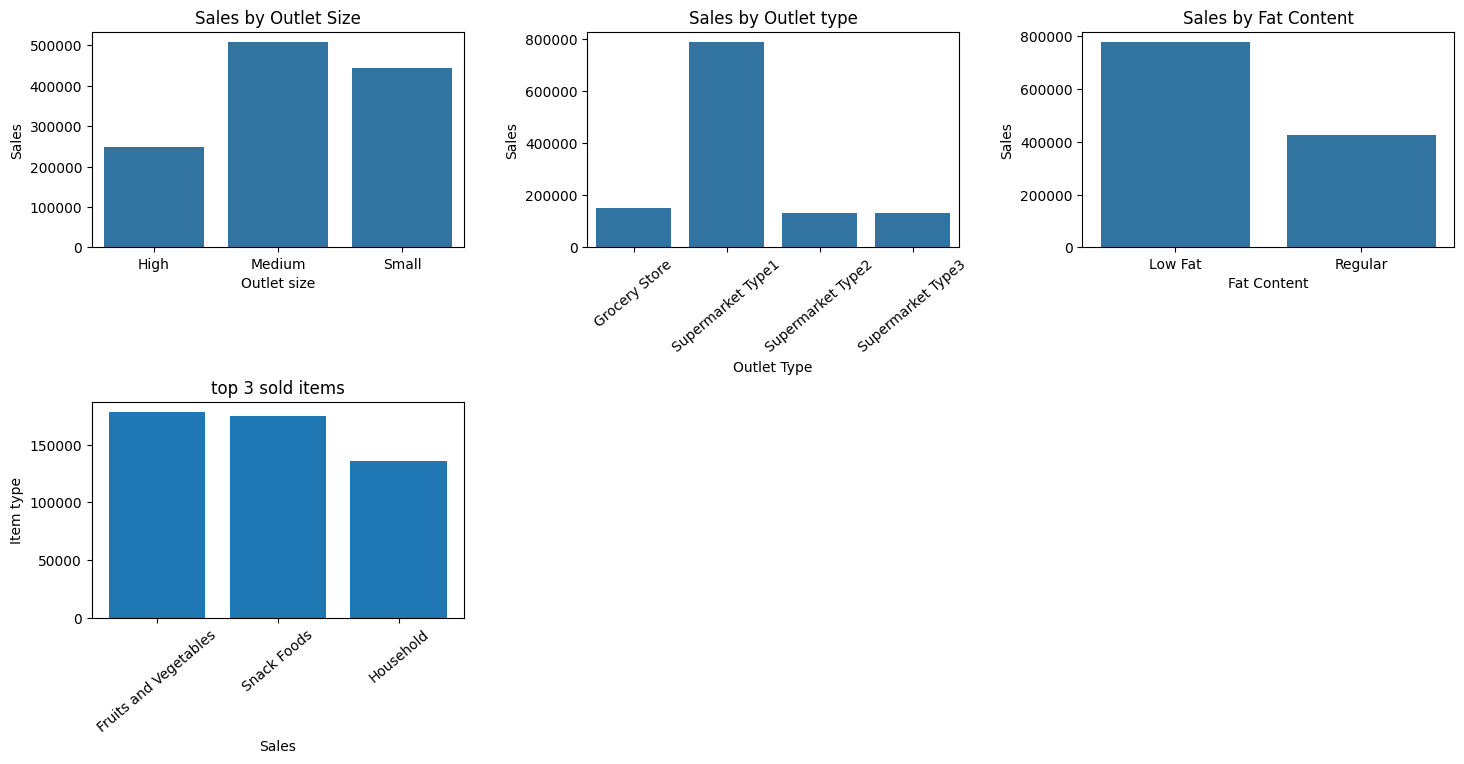

In [60]:
plt.figure(figsize=(15,8))

sales_outlet_size = data.groupby('Outlet Size')['Total Sales'].sum()

plt.subplot(2,3,1)
sns.barplot(x=sales_outlet_size.index,y=sales_outlet_size.values)
plt.title('Sales by Outlet Size')
plt.xlabel('Outlet size')
plt.ylabel('Sales')

sales_outlet_type = data.groupby('Outlet Type')['Total Sales'].sum()

plt.subplot(2,3,2)
sns.barplot(x=sales_outlet_type.index,y=sales_outlet_type.values)
plt.title('Sales by Outlet type')
plt.xlabel('Outlet Type')
plt.ylabel('Sales')
plt.xticks(rotation=40)

fat_content_sales = data.groupby('Item Fat Content')['Total Sales'].sum()

plt.subplot(2,3,3)
sns.barplot(x=fat_content_sales.index,y=fat_content_sales.values)
plt.title('Sales by Fat Content')
plt.xlabel('Fat Content')
plt.ylabel('Sales')

top_items = data.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False).head(3)

plt.subplot(2,3,4)
plt.title('top 3 sold items')
plt.bar(x=top_items.index,height=top_items.values) 
plt.xlabel('Sales')
plt.ylabel('Item type')
plt.xticks(rotation=40)

plt.tight_layout(pad=2.0)
plt.show()

##### Findings:
- Medium-sized outlets actually sell more (~507k) than High-sized outlets (~248k).
- And the Supermarket Type 1 has the very high sales among other outlet type i.e above 775k.
- Low Fat products generate nearly double the sales (~776k) compared to Regular fat products (~425k).
- The top 3 selling categories are Fruits & Vegetables, Snack Foods, and Household items.

##### Recommendation: 
- Investigate why "High" sized outlets are underperforming. It could be due to location (Tier 3 vs Tier 1) or operational inefficiencies.
- Prioritize inventory stock for Type 1 supermarkets as they are the primary revenue drivers.
- Marketing campaigns should highlight health-conscious (Low Fat) options.
- Ensure these high-demand categories are always well-stocked and placed in high-visibility areas.


<span style="color:red;"> Finding relationships between various factors.</span>

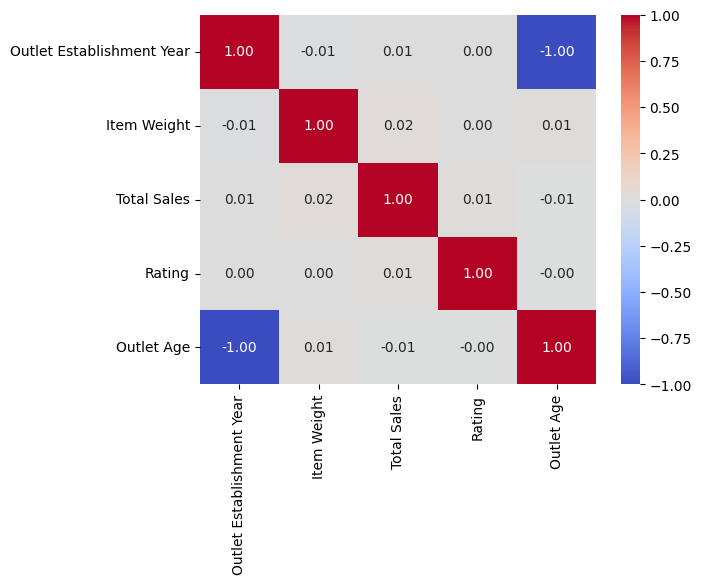

In [35]:
numerical_cols = data.select_dtypes(include='number')
correlation_matrix = numerical_cols.corr()

sns.heatmap(correlation_matrix,cmap='coolwarm',annot=True,fmt=".2f")
plt.show()

*From the upper heatmap we see that there is not an extreme relationship between the factors on which we can make decisions*